In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
#Load Dataset
df = pd.read_csv("StudentPerformanceFactors.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
#Explore Dataset
print("Shape:", df.shape)
print("\nInfo:\n")
print(df.info())
print("\nDescribe:\n", df.describe())
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())

Shape: (6607, 20)

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence        

In [ ]:
#Handle Missing Values for Categorical Columns
categorical_cols = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'School_Type']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing Values After Filling:\n", df.isnull().sum())



Missing Values After Filling:
 Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


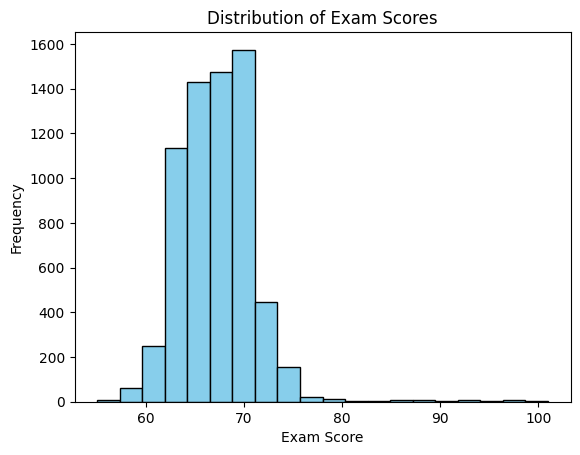

In [ ]:
#Visualizations

# Exam Score Distribution
plt.hist(df['Exam_Score'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.title("Distribution of Exam Scores")
plt.show()


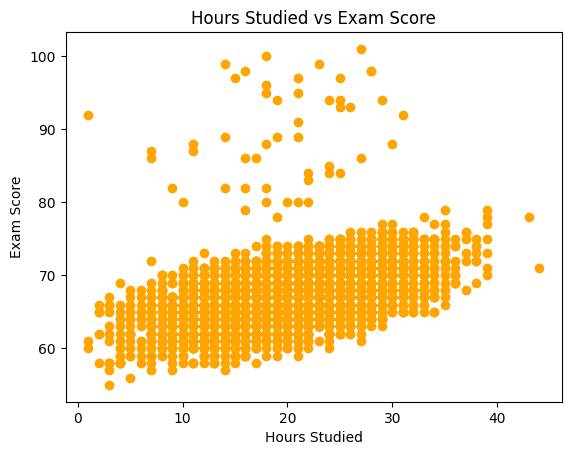

In [7]:
# Hours Studied vs Exam Score
plt.scatter(df['Hours_Studied'], df['Exam_Score'], color='orange')
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Hours Studied vs Exam Score")
plt.show()

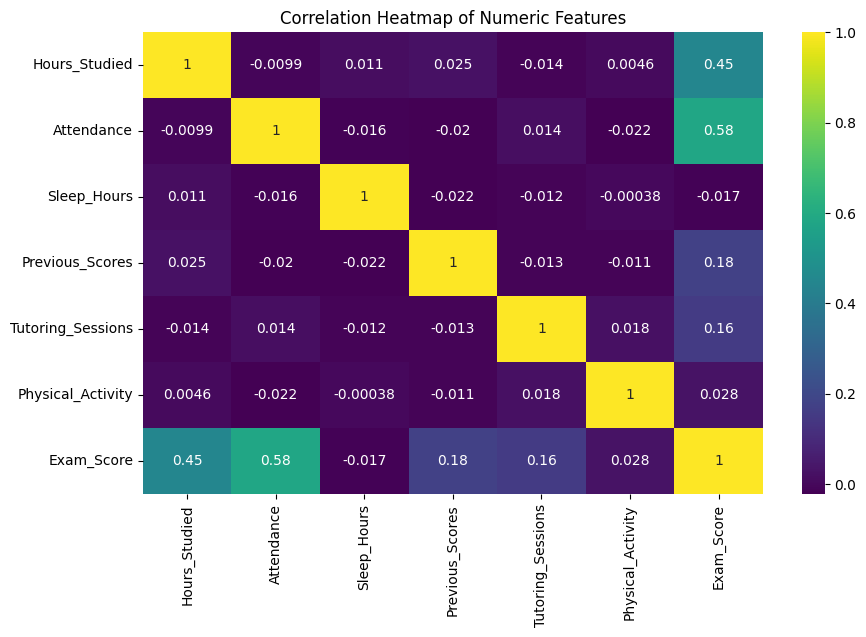

In [9]:
# Correlation Heatmap for Numeric Features
numeric_df = df.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="viridis")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

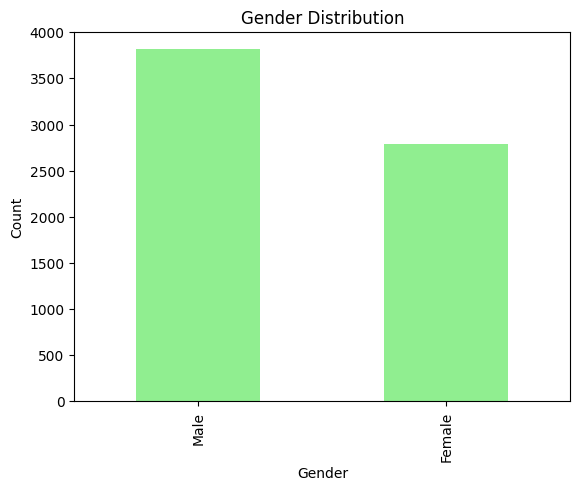

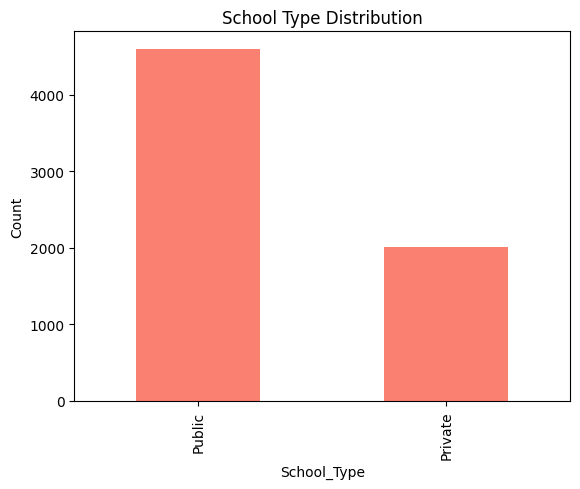

In [10]:
# Categorical Distribution Examples
df['Gender'].value_counts().plot(kind='bar', color='lightgreen')
plt.title("Gender Distribution")
plt.ylabel("Count")
plt.show()

df['School_Type'].value_counts().plot(kind='bar', color='salmon')
plt.title("School Type Distribution")
plt.ylabel("Count")
plt.show()

In [ ]:
#Select Features & Target

X = df[['Hours_Studied']]
y = df['Exam_Score']

In [ ]:
#Split Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (5285, 1)
Testing set shape: (1322, 1)


In [ ]:
#Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)

# Display first 10 predictions
y_pred[:10]

array([67.22454236, 67.79587985, 67.5102111 , 64.9391924 , 67.5102111 ,
       67.5102111 , 72.08091101, 68.36721734, 66.36753612, 66.08186738])

In [ ]:
#Evaluate Linear Regression Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance Metrics:")
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

Linear Regression Performance Metrics:
MSE: 10.85592128879332
RMSE: 3.294832513010839
R² Score: 0.2319868674542106


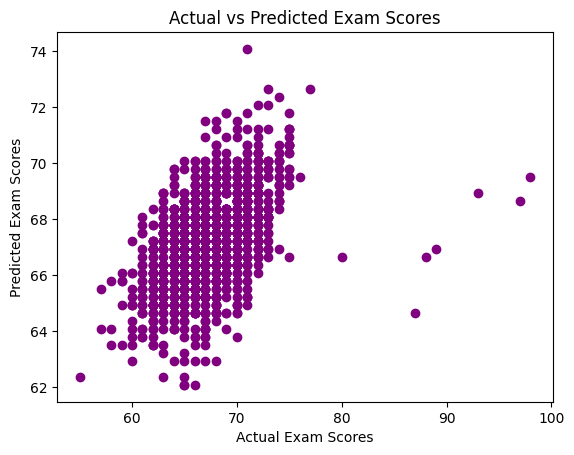

In [ ]:
#Visualize Predictions

# Actual vs Predicted Scatter
plt.scatter(y_test, y_pred, color='purple')
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores")
plt.show()


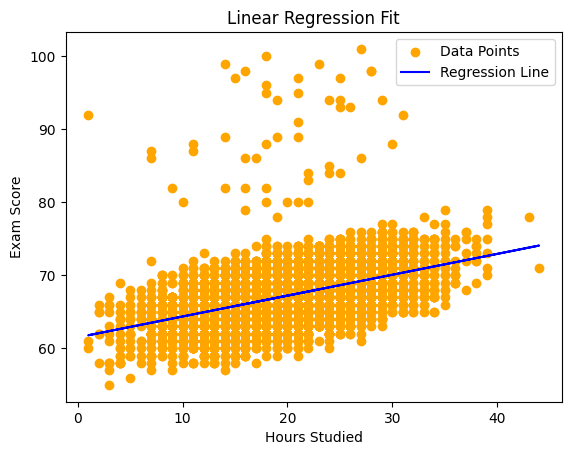

In [16]:
# Regression Line Fit
plt.scatter(df['Hours_Studied'], df['Exam_Score'], label="Data Points", color='orange')
plt.plot(df['Hours_Studied'], lr_model.predict(df[['Hours_Studied']]), color='blue', label="Regression Line")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

Bonus 1

Polynomial Regression (Degree 2) Performance Metrics:
MSE: 10.84498813570501
RMSE: 3.2931729586684346
R² Score: 0.23276034442853466


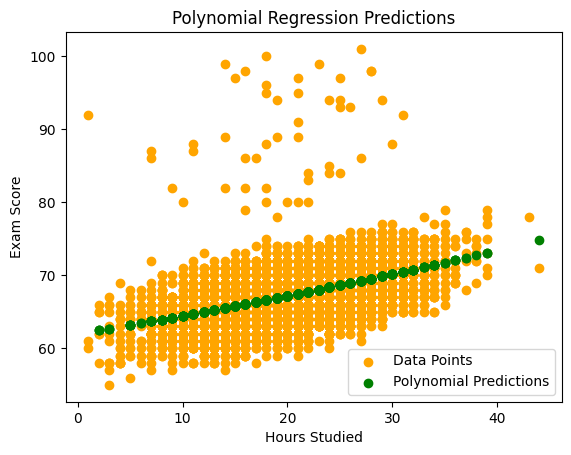

In [17]:
# Degree 2 polynomial
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate Polynomial Regression
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

print("Polynomial Regression (Degree 2) Performance Metrics:")
print("MSE:", mse_poly)
print("RMSE:", rmse_poly)
print("R² Score:", r2_poly)

# Plot Polynomial Fit
plt.scatter(X, y, label="Data Points", color='orange')
plt.scatter(X_test, y_pred_poly, color='green', label="Polynomial Predictions")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Polynomial Regression Predictions")
plt.legend()
plt.show()


Bonus 2

In [ ]:
#Bonus2

# Select numeric + categorical features we want to use
multi_features = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 
                  'Previous_Scores', 'Motivation_Level', 'Family_Income']

# Convert categorical features to numeric using one-hot encoding
X_multi = pd.get_dummies(df[multi_features], drop_first=True)
y_multi = df['Exam_Score']

# Train/test split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

# Train linear regression
multi_model = LinearRegression()
multi_model.fit(X_train_m, y_train_m)

# Predict
y_pred_multi = multi_model.predict(X_test_m)

# Evaluate
mse_multi = mean_squared_error(y_test_m, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
r2_multi = r2_score(y_test_m, y_pred_multi)

print("Multiple Feature Linear Regression Performance Metrics:")
print("MSE:", mse_multi)
print("RMSE:", rmse_multi)
print("R² Score:", r2_multi)



Multiple Feature Linear Regression Performance Metrics:
MSE: 5.0460651883370105
RMSE: 2.2463448507157158
R² Score: 0.6430110140605361
